
<h1 style="text-align: center;">Netflix Analysis</h1>


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
from IPython.display import Image

# Replace the URL with the link to your GIF
gif_url = 'https://media.tenor.com/miBRlkp03LkAAAAi/netflix.gif'

# Display the GIF
Image(url=gif_url)

In [10]:
data = pd.read_csv('netflix_titles.csv')

In [5]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [6]:
data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [11]:
data.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [12]:
data['director'].fillna('Unknown', inplace=True)

In [13]:
data.isnull().sum()

show_id           0
type              0
title             0
director          0
cast            825
country         831
date_added       10
release_year      0
rating            4
duration          3
listed_in         0
description       0
dtype: int64

In [17]:
type_counts = data['type'].value_counts()


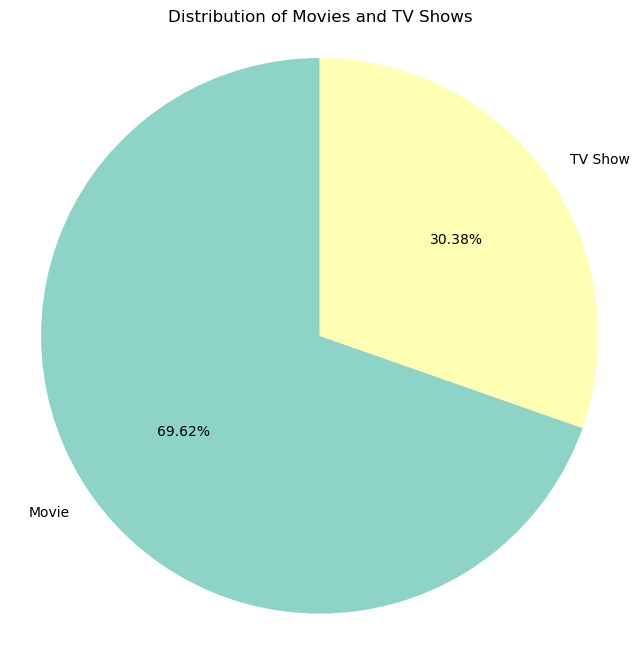

In [18]:
plt.figure(figsize=(8, 8))
plt.pie(
    type_counts,
    labels=type_counts.index,
    autopct='%.2f%%',
    startangle=90,
    colors=sns.color_palette("Set3", n_colors=len(type_counts))
)
plt.title("Distribution of Movies and TV Shows")
plt.axis("equal")  
plt.show()

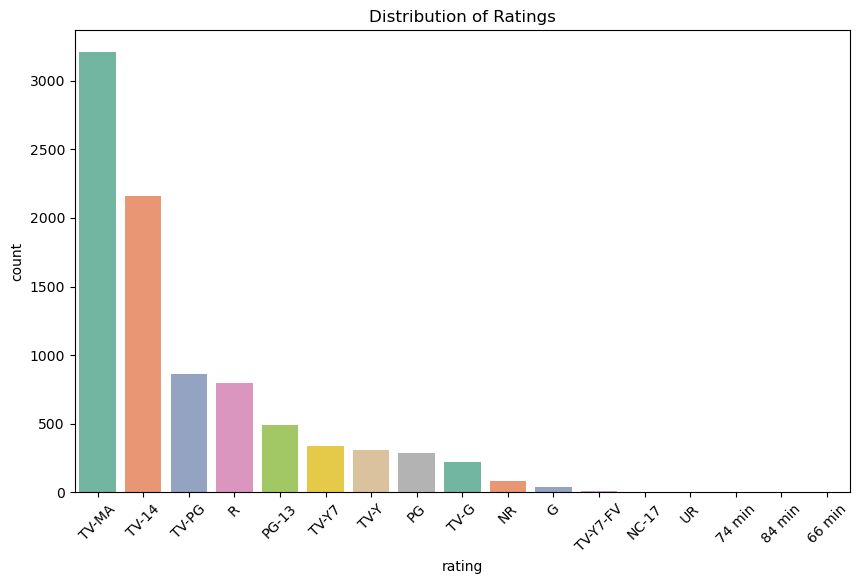

In [21]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='rating', order=data['rating'].value_counts().index, palette="Set2")
plt.title('Distribution of Ratings')
plt.xticks(rotation=45)
plt.show()

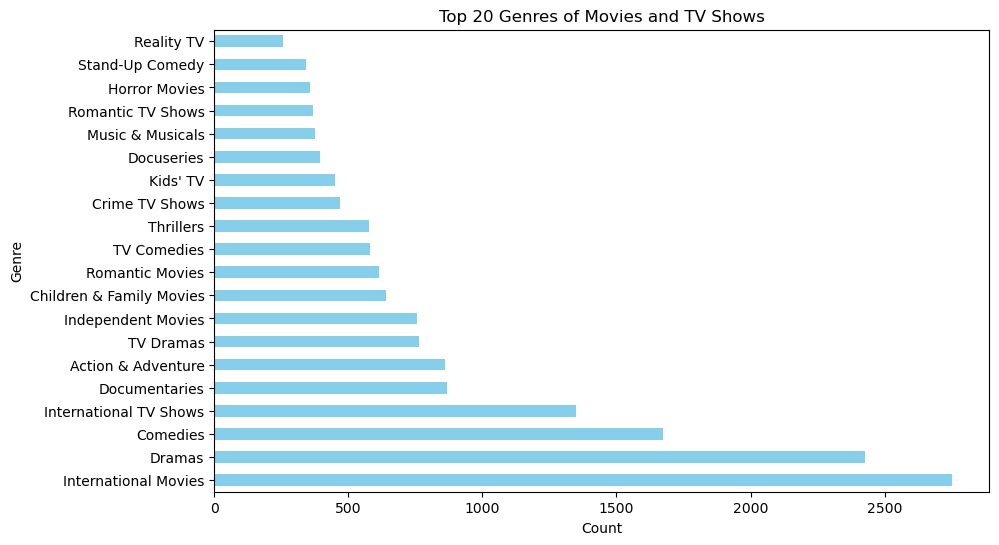

In [24]:
# Distribution of movies and series by genre
genres = data['listed_in'].str.split(', ', expand=True).stack()
genre_counts = genres.value_counts()

plt.figure(figsize=(10, 6))
genre_counts.head(20).plot(kind='barh', color='skyblue')   
plt.title('Top 20 Genres of Movies and TV Shows')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()


<h1 style="text-align: center;">Time Based Analysis</h1>


In [28]:
data = data.dropna(subset=['date_added'])
data['rating'] = data['rating'].fillna(data['rating'].mode()[0])
data['date_added'] = pd.to_datetime(data['date_added'], errors='coerce')
data['year_added'] = data['date_added'].dt.year
data = data[data['year_added'] != 0]
data['year_added'] = data['year_added'].astype('Int64')

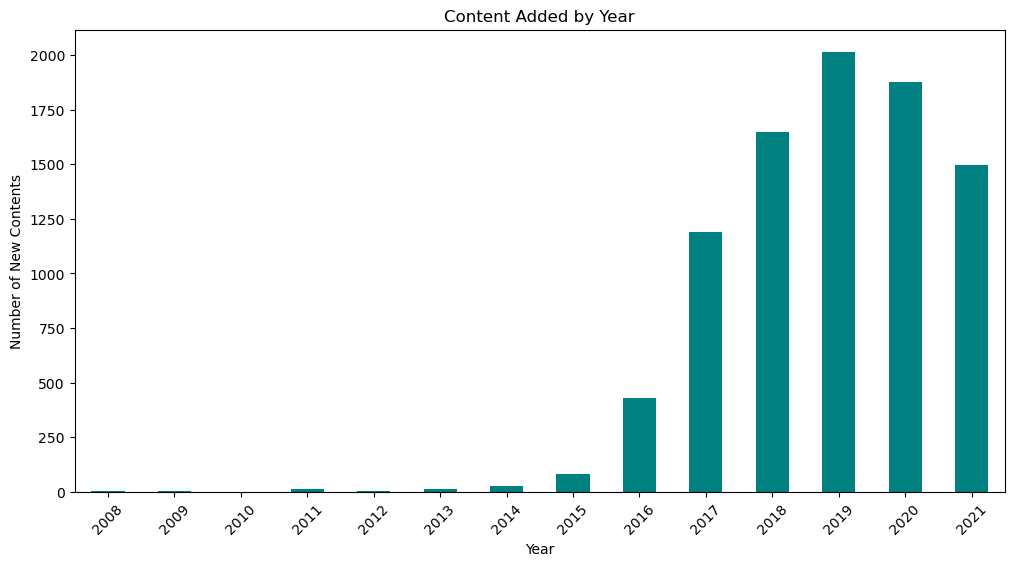

In [29]:
yearly_data = data.groupby('year_added').size()
# Change in annual content number
plt.figure(figsize=(12, 6))
yearly_data.plot(kind='bar', color='teal')
plt.title('Content Added by Year')
plt.xlabel('Year')
plt.ylabel('Number of New Contents')
plt.xticks(rotation=45)
plt.show()

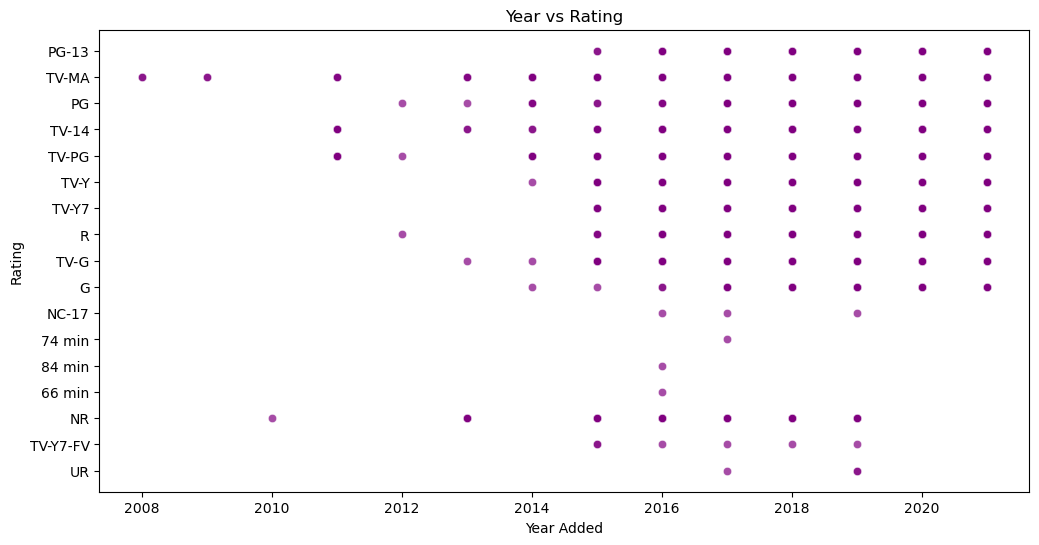

In [30]:
# Relationship between year and rating
plt.figure(figsize=(12, 6))
sns.scatterplot(data=data, x='year_added', y='rating', alpha=0.7, color='purple')
plt.title('Year vs Rating')
plt.xlabel('Year Added')
plt.ylabel('Rating')
plt.show()

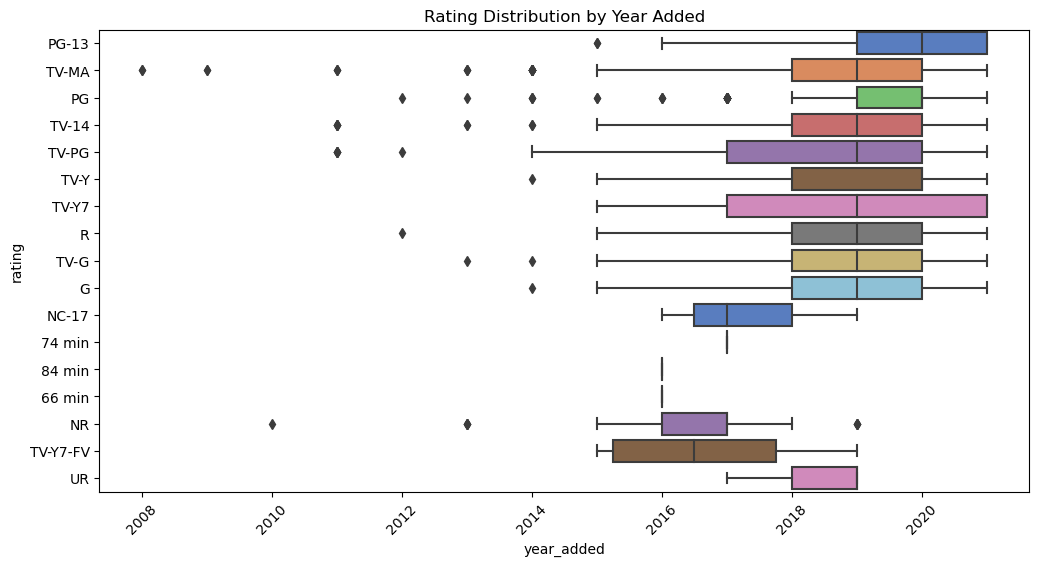

In [31]:
# Rating distribution by year
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='year_added', y='rating', palette='muted')
plt.title('Rating Distribution by Year Added')
plt.xticks(rotation=45)
plt.show()

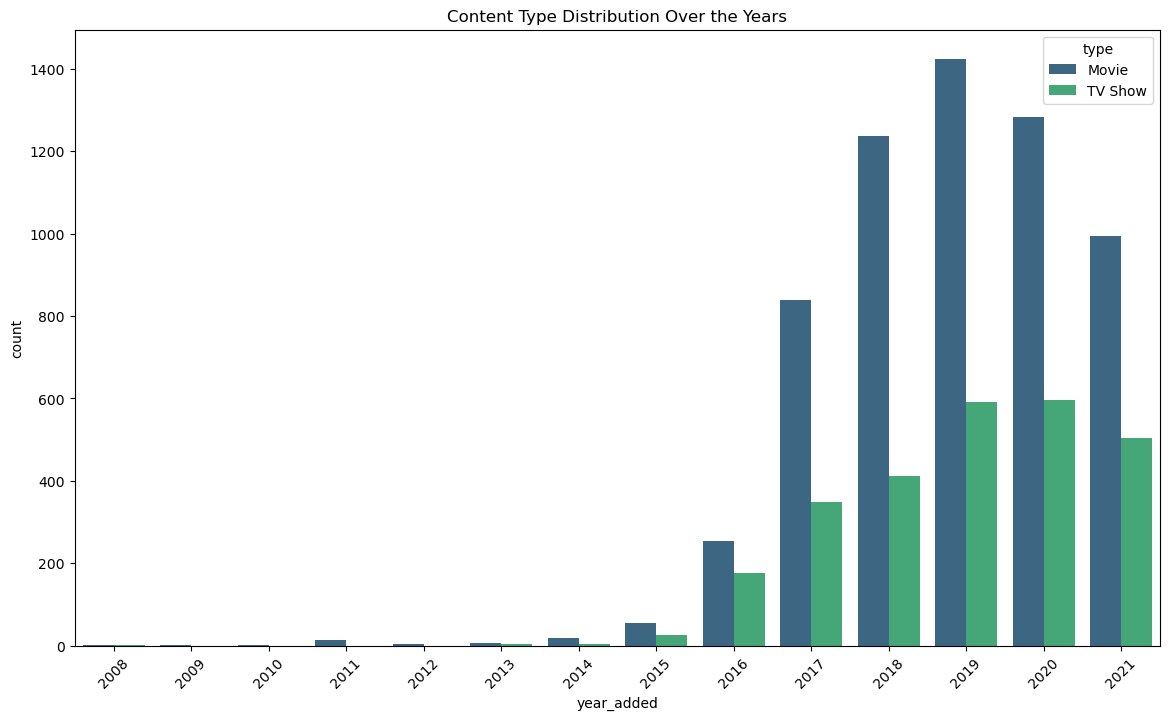

In [32]:
# Species distribution by year
plt.figure(figsize=(14, 8))
sns.countplot(data=data, x='year_added', hue='type', palette='viridis')
plt.title('Content Type Distribution Over the Years')
plt.xticks(rotation=45)
plt.show()